In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


X = tf.range(-100, 100, 4)

# X = tf.reshape(df, shape=[50,1])

Y = tf.add(df, 10)


xTrain = X[:40]
xTest = X[40:]

yTrain = Y[:40]
yTest = Y[40:]

model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation=None, input_shape=[1], name="input_layer"),
        # tf.keras.layers.Dense(3, activation=None, input_shape=[1], name="input2_layer"),
        tf.keras.layers.Dense(1, name = "output_layer")
], name = "model_1")


model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.1),
              metrics=['mae'])

model.fit(xTrain, yTrain, epochs=50, verbose=1)




#Dense is how many lines are connected





/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
2/2 [==============================] - 0s 7ms/step - loss: 92.3945 - mae: 92.3945
Epoch 2/50
2/2 [==============================] - 0s 4ms/step - loss: 29.5574 - mae: 29.5574
Epoch 3/50
2/2 [==============================] - 0s 6ms/step - loss: 21.1926 - mae: 21.1926
Epoch 4/50
2/2 [==============================] - 0s 5ms/step - loss: 18.4279 - mae: 18.4279
Epoch 5/50
2/2 [==============================] - 0s 4ms/step - loss: 9.0376 - mae: 9.0376
Epoch 6/50
2/2 [==============================] - 0s 5ms/step - loss: 18.3019 - mae: 18.3019
Epoch 7/50
2/2 [==============================] - 0s 6ms/step - loss: 16.4916 - mae: 16.4916
Epoch 8/50
2/2 [==============================] - 0s 5ms/step - loss: 7.6728 - mae: 7.6728
Epoch 9/50
2/2 [==============================] - 0s 5ms/step - loss: 12.3838 - mae: 12.3838
Epoch 10/50
2/2 [==============================] - 0s 4ms/step - loss: 14.7893 - mae: 14.7893
Epoch 11/50
2/2 [==============================] - 0s 4ms/step - loss: 9.

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


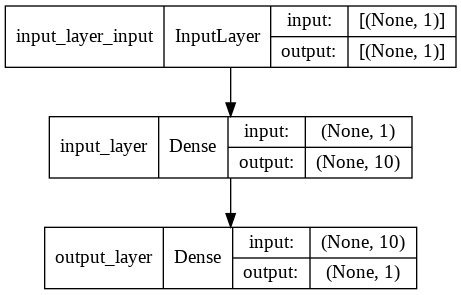

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [ ]:
yPred = model.predict(xTest)

yPred, yTest

(array([[ 71.895355],
        [ 76.037   ],
        [ 80.17865 ],
        [ 84.3203  ],
        [ 88.461945],
        [ 92.60359 ],
        [ 96.74524 ],
        [100.88689 ],
        [105.02852 ],
        [109.17018 ]], dtype=float32),
 <tf.Tensor: shape=(10, 1), dtype=int32, numpy=
 array([[ 70],
        [ 74],
        [ 78],
        [ 82],
        [ 86],
        [ 90],
        [ 94],
        [ 98],
        [102],
        [106]], dtype=int32)>)

In [ ]:
#dfining our data visualizer for our predictions


def visualizer(xTrain, yTrain, xTest, yTest, yPred):

  plt.figure(figsize=(8, 7))

  plt.scatter(xTrain, yTrain,c="b", label="Training data")
  plt.scatter(xTest, yTest, c="g", label="Testing data")
  plt.scatter(xTest, yPred, c="r", label="predicted data")


  plt.scatter()
  plt.legend()


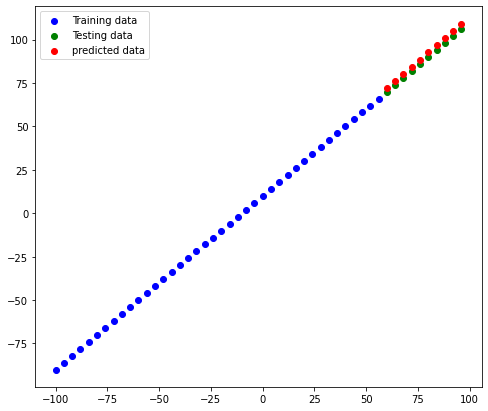

In [ ]:
visualizer(xTrain, yTrain, xTest, yTest, yPred)

In [ ]:
model.evaluate(xTest, yTest)

# yPred  = tf.squeeze(tf.constant(yPred))

yTest = tf.squeeze(yTest)

yPred, yTest


mae = tf.metrics.mean_absolute_error(y_true = yTest, y_pred = yPred)
mae

1/1 [==============================] - 0s 19ms/step - loss: 2.5328 - mae: 2.5328


<tf.Tensor: shape=(), dtype=float32, numpy=2.5327668>

In [ ]:
#if you want to compare two tensors together, you would need the shape of the tensors to be equal

yPred, yTest

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 71.895355,  76.037   ,  80.17865 ,  84.3203  ,  88.461945,
         92.60359 ,  96.74524 , 100.88689 , 105.02852 , 109.17018 ],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
tf.metrics.mean_squared_error(y_true=yTest, y_pred = yPred)

<tf.Tensor: shape=(), dtype=float32, numpy=6.580434>

In [ ]:
def maeFunction(yData, yPred):
  return tf.metrics.mean_absolute_error(y_true=yData, y_pred=yPred)


def mseFunction(yData, yPred):
  return tf.metrics.mean_squared_error(y_true = yData, y_pred = yPred)

In [ ]:
maeFunction(yTest, yPred)

mseFunction(yTest, yPred)

<tf.Tensor: shape=(), dtype=float32, numpy=6.580434>